In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")


In [2]:
article_df = pd.read_csv("./data/olympics_article_remove_duplicates.csv", encoding="utf-8")

In [8]:
article_df.count()

date       33856
title      33856
content    33853
dtype: int64

In [4]:
art_df = pd.read_csv("./data/preprocessed_olympics_article_content.csv", encoding="utf-8")

In [10]:
art_df.isnull()

,Unnamed: 0,date,title,content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
62828,False,False,False,False
62829,False,False,False,False
62830,False,False,False,False
62831,False,False,False,False


In [7]:
ranking_df = pd.read_csv("./data/olympic_ranking.csv", encoding="utf-8")

In [10]:
ranking_df

,num,city,ranking,gold,silver,bronze
0,27,시드니,12,8,10,10
1,28,아테네,9,9,12,9
2,29,베이징,7,13,11,8
3,30,런던,5,13,9,9
4,31,리우데자네이루,8,9,3,9
5,32,도쿄,16,6,4,10
6,33,파리,8,13,9,10


C:\Users\양효준\AppData\Local\Temp\ipykernel_32592\3918513416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympic_new_df['num'] = olympic_new_df['city'].map(olympic_mapping)


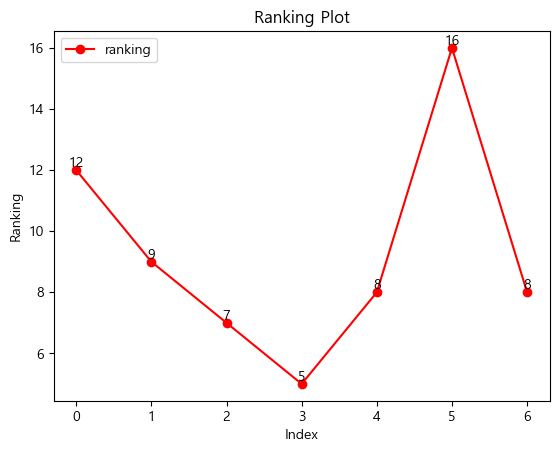

In [39]:
olympic_mapping = {
    '시드니': 2000,
    '아테네': 2004,
    '베이징': 2008,
    '런던': 2012,
    '리우데자네이루': 2016,
    '도쿄': 2020,
    '파리': 2024
}

olympic_new_df['num'] = olympic_new_df['city'].map(olympic_mapping)
olympic_new_df = olympic_new_df.sort_values(by='num')

plt.plot(ranking_df['ranking'], marker='o', color='red', label='ranking')

for i in range(len(ranking_df)):
    plt.text(i, ranking_df['ranking'][i], str(ranking_df['ranking'][i]), 
             ha='center', va='bottom')

plt.xlabel('Index')
plt.ylabel('Ranking')
plt.title('Ranking Plot')
plt.legend()
plt.show()


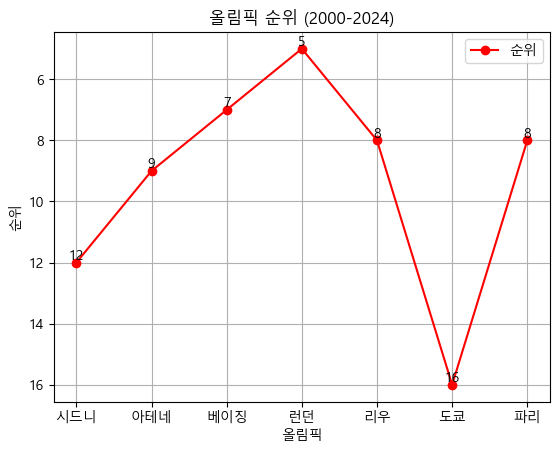

In [45]:
import matplotlib.pyplot as plt

# x축에 사용할 올림픽 연도 리스트 (2000년 시드니부터 2024년 파리까지)
olympic_years = [2000, 2004, 2008, 2012, 2016, 2020, 2024]
olympic_cities = ['시드니', '아테네', '베이징', '런던', '리우', '도쿄', '파리']

# 순위 데이터가 이미 연도 순으로 정렬되어 있다고 가정
plt.plot(olympic_years, ranking_df['ranking'], marker='o', color='red', label='순위')

# 각 데이터 포인트에 텍스트 추가 (순위 표시)
for i in range(len(ranking_df)):
    plt.text(olympic_years[i], ranking_df['ranking'][i], str(ranking_df['ranking'][i]), 
             ha='center', va='bottom')

# y축 반전
plt.gca().invert_yaxis()

# x축 레이블을 올림픽 개최 도시로 표시
plt.xticks(olympic_years, olympic_cities)

plt.xlabel('올림픽')
plt.ylabel('순위')
plt.title('올림픽 순위 (2000-2024)')
plt.legend()
plt.grid()
plt.show()


In [20]:
medalists_df = pd.read_csv("./data/olympics_medalists.csv", encoding="utf-8")

In [21]:
medalists_df["total"] = medalists_df["gold"] +  medalists_df["silver"] + medalists_df["bronze"]

In [22]:
medalists_df = pd.DataFrame(medalists_df)

In [23]:
medalists_df

,num,city,name,event,gold,silver,bronze,total
0,27,시드니,강건욱,하키,0,1,0,1
1,27,시드니,강초현,사격,0,1,0,1
2,27,시드니,구대성,야구,0,0,1,1
3,27,시드니,김경석,하키,0,1,0,1
4,27,시드니,김경훈,태권도,1,0,0,1
...,...,...,...,...,...,...,...,...
349,33,파리,임애지,복싱,0,0,1,1
350,33,파리,임종훈,탁구,0,0,1,1
351,33,파리,전지희,탁구,0,0,1,1
352,33,파리,정예린,유도,0,0,1,1


In [24]:
paris_df = pd.read_csv("./data/olympic_paris_players.csv", encoding="utf-8")

In [25]:
paris_df['num_players'] = paris_df.groupby('event')['name'].transform('nunique')

In [26]:
paris_df = paris_df.drop(columns='name').groupby('event').agg({
    'gold': 'sum',
    'silver': 'sum',
    'bronze': 'sum',
    'num_players': 'first'
}).reset_index()

In [27]:
paris_df['num'] = range(1, len(paris_df) + 1)  
paris_df['city'] = '파리' 
paris_df["num"] = "33"

paris_df = paris_df[['num', 'city', 'event', 'num_players', 'gold', 'silver', 'bronze']]

In [28]:
df = pd.read_csv("./data/olympics_events.csv", encoding="utf-8")

In [29]:
df = df[df["num_players"] != 0]
df = df[df["num_players"].notna()]

In [30]:
df

,num,city,event,num_players,gold,silver,bronze
1,27,시드니,농구,12,0,0,0
2,27,시드니,레슬링,10,1,2,1
3,27,시드니,배구,24,0,0,0
4,27,시드니,배드민턴,12,0,1,1
5,27,시드니,복싱,9,0,0,0
...,...,...,...,...,...,...,...
190,33,파리,체조,8,0,0,0
191,33,파리,탁구,6,0,0,2
192,33,파리,태권도,4,2,0,1
193,33,파리,펜싱,14,2,1,0


In [31]:
olympic_df = pd.concat([df, paris_df], ignore_index=True).reset_index()

In [32]:
olympic_df = olympic_df.drop(columns="index")

In [33]:
olympic_df = pd.read_csv("./data/olympics_events.csv", encoding="utf-8")

In [34]:
olympic_df

,num,city,event,num_players,gold,silver,bronze
0,27,시드니,근대5종,0,0,0,0
1,27,시드니,농구,12,0,0,0
2,27,시드니,레슬링,10,1,2,1
3,27,시드니,배구,24,0,0,0
4,27,시드니,배드민턴,12,0,1,1
...,...,...,...,...,...,...,...
190,33,파리,체조,8,0,0,0
191,33,파리,탁구,6,0,0,2
192,33,파리,태권도,4,2,0,1
193,33,파리,펜싱,14,2,1,0


In [35]:
olympic_df["total"] = olympic_df["gold"] + olympic_df["silver"] + olympic_df["bronze"]

In [36]:
olympic_df

,num,city,event,num_players,gold,silver,bronze,total
0,27,시드니,근대5종,0,0,0,0,0
1,27,시드니,농구,12,0,0,0,0
2,27,시드니,레슬링,10,1,2,1,4
3,27,시드니,배구,24,0,0,0,0
4,27,시드니,배드민턴,12,0,1,1,2
...,...,...,...,...,...,...,...,...
190,33,파리,체조,8,0,0,0,0
191,33,파리,탁구,6,0,0,2,2
192,33,파리,태권도,4,2,0,1,3
193,33,파리,펜싱,14,2,1,0,3


In [37]:
olympic_new_df = olympic_df[olympic_df["total"] != 0]

In [38]:
olympic_new_df

,num,city,event,num_players,gold,silver,bronze,total
2,27,시드니,레슬링,10,1,2,1,4
4,27,시드니,배드민턴,12,0,1,1,2
6,27,시드니,사격,8,0,1,0,1
11,27,시드니,야구,24,0,0,1,1
12,27,시드니,양궁,6,3,1,1,5
...,...,...,...,...,...,...,...,...
186,33,파리,역도,5,0,1,0,1
188,33,파리,유도,11,0,2,3,5
191,33,파리,탁구,6,0,0,2,2
192,33,파리,태권도,4,2,0,1,3


In [68]:
article_df = pd.read_csv("./data/preprocessed_olympics_article_content.csv", encoding="utf-8")

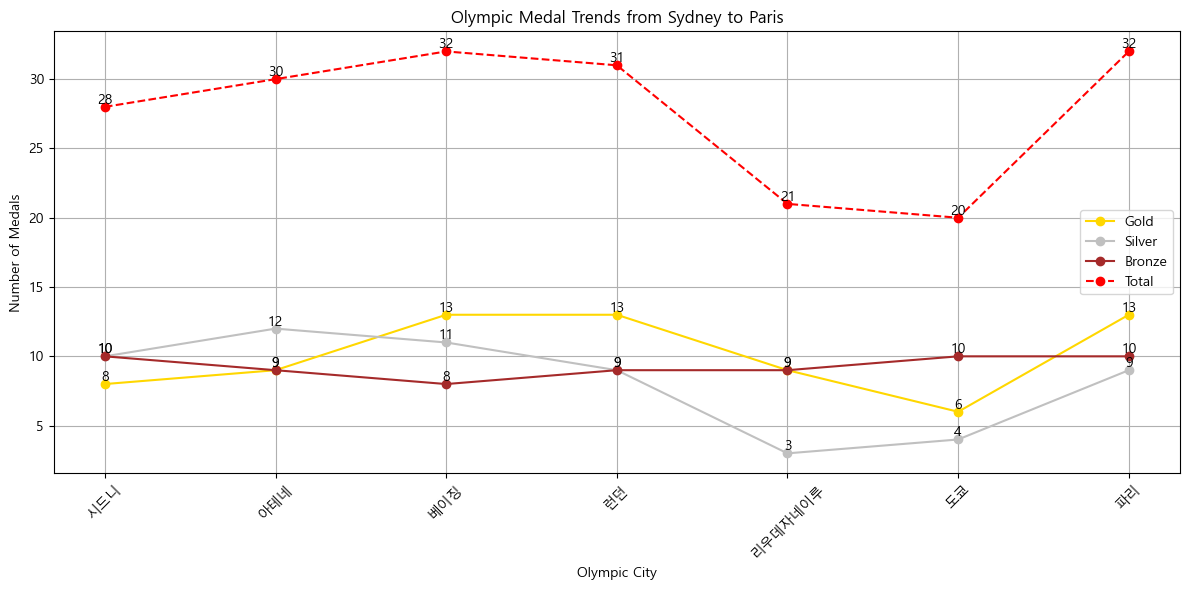

In [45]:
medal_trend = olympic_df.groupby(['num', 'city'])[['gold', 'silver', 'bronze']].sum().reset_index()
medal_trend['total'] = medal_trend['gold'] + medal_trend['silver'] + medal_trend['bronze']


plt.figure(figsize=(12, 6))
plt.plot(medal_trend['city'], medal_trend['gold'], marker='o', color='gold', label='Gold')
plt.plot(medal_trend['city'], medal_trend['silver'], marker='o', color='silver', label='Silver')
plt.plot(medal_trend['city'], medal_trend['bronze'], marker='o', color='brown' ,label='Bronze')
plt.plot(medal_trend['city'], medal_trend['total'], marker='o', color='red', label='Total', linestyle='--')


plt.title('Olympic Medal Trends from Sydney to Paris')
plt.xlabel('Olympic City')
plt.ylabel('Number of Medals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

for i in range(len(medal_trend)):
    plt.text(medal_trend['city'][i], medal_trend['gold'][i], str(medal_trend['gold'][i]), ha='center', va='bottom')
    plt.text(medal_trend['city'][i], medal_trend['silver'][i], str(medal_trend['silver'][i]), ha='center', va='bottom')
    plt.text(medal_trend['city'][i], medal_trend['bronze'][i], str(medal_trend['bronze'][i]), ha='center', va='bottom')
    plt.text(medal_trend['city'][i], medal_trend['total'][i], str(medal_trend['total'][i]), ha='center', va='bottom')

plt.show()

C:\Users\양효준\AppData\Local\Temp\ipykernel_33328\2069789279.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


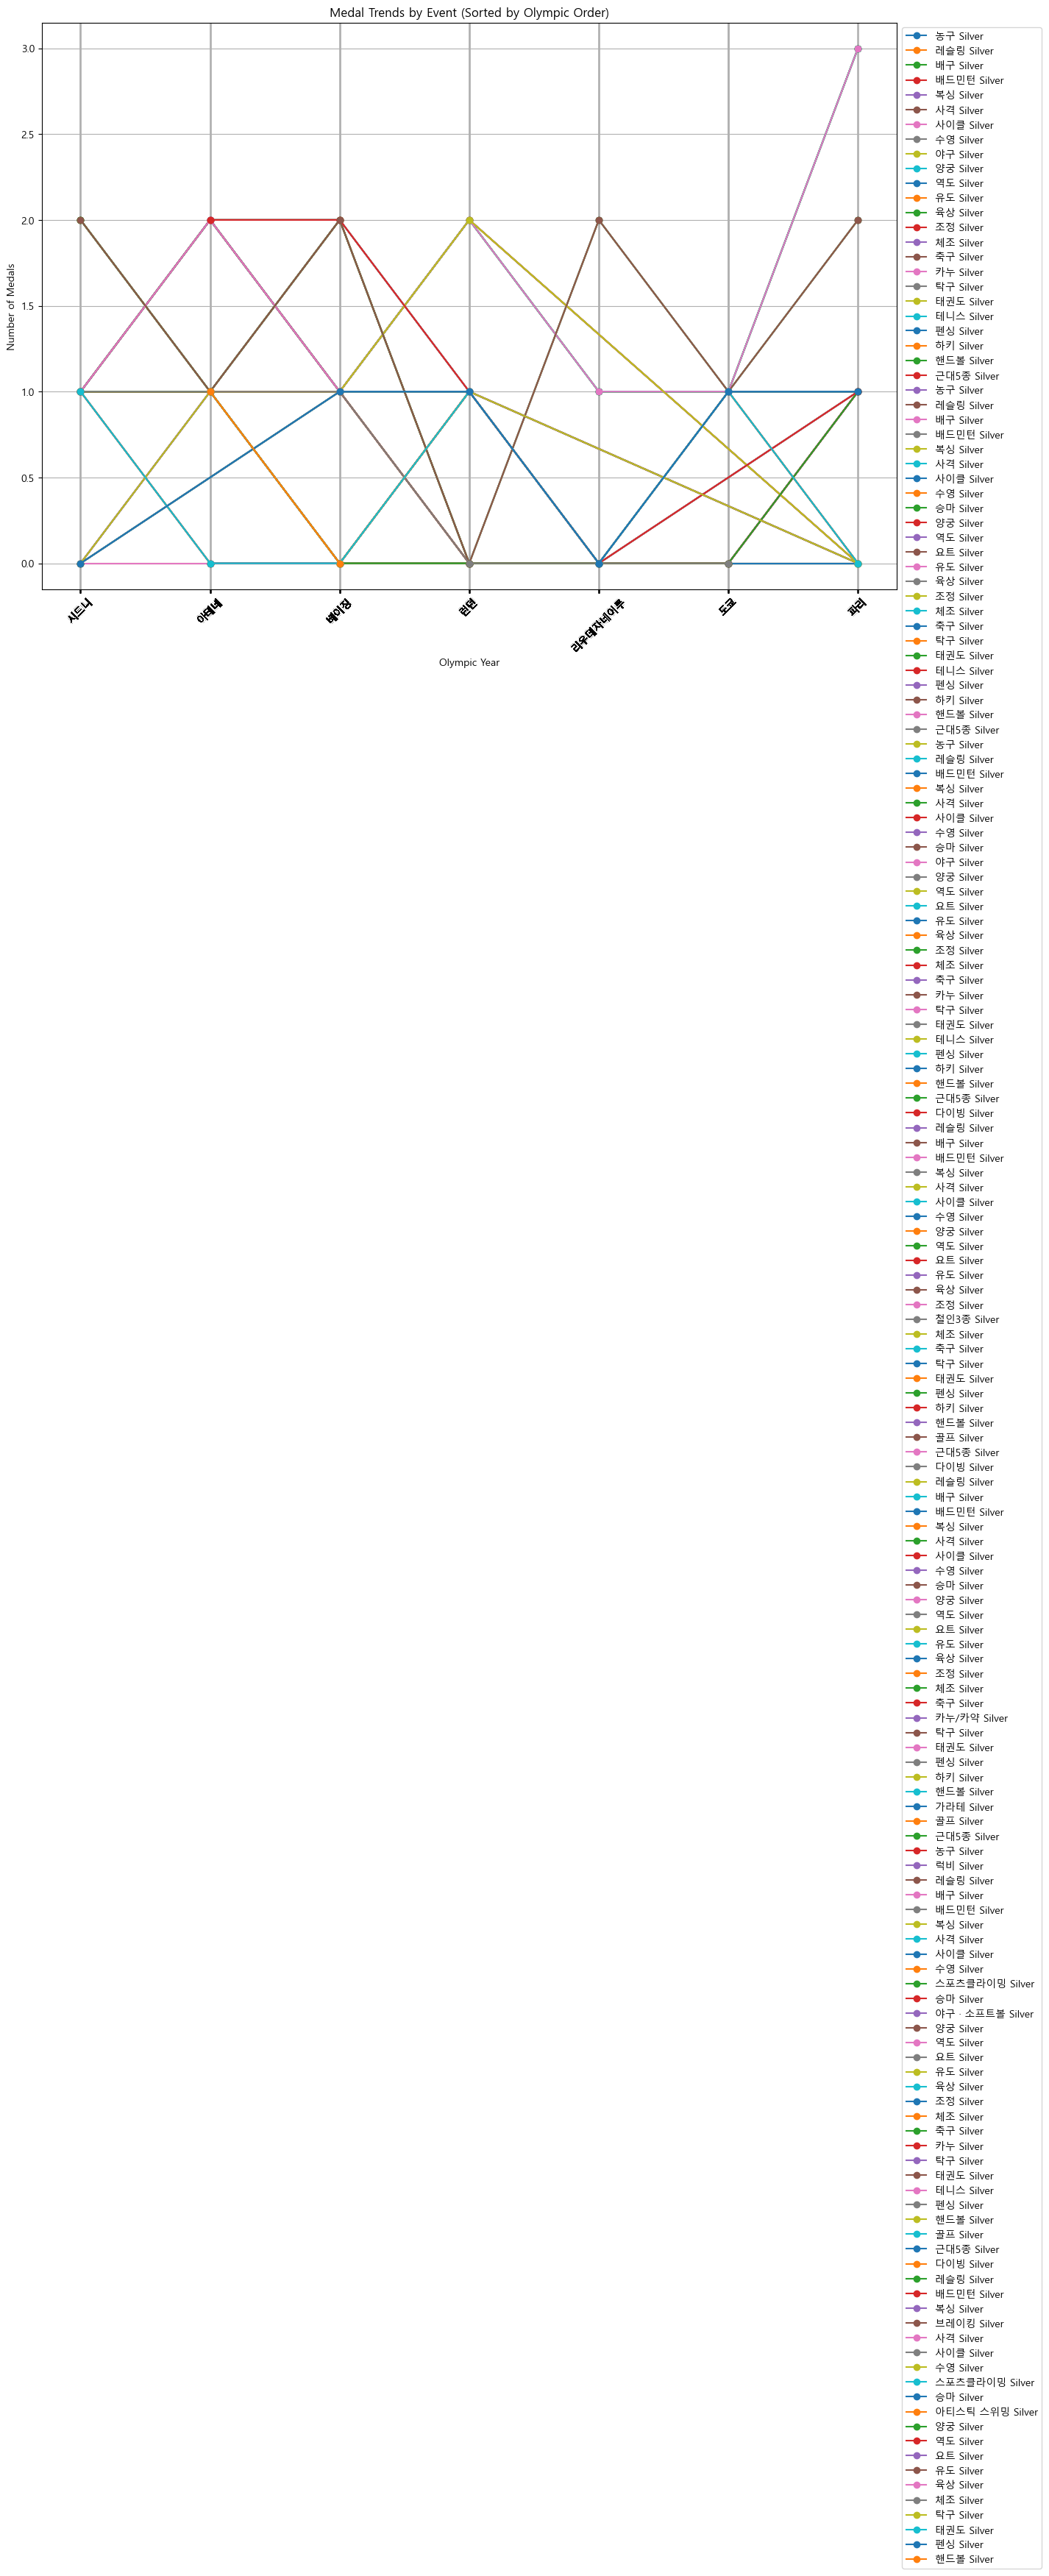

In [40]:
olympic_mapping = {
    '시드니': 2000,
    '아테네': 2004,
    '베이징': 2008,
    '런던': 2012,
    '리우데자네이루': 2016,
    '도쿄': 2020,
    '파리': 2024
}

olympic_new_df['num'] = olympic_new_df['city'].map(olympic_mapping)

olympic_new_df = olympic_new_df.sort_values(by='num')

plt.figure(figsize=(15, 10))

# 각 종목별 메달 추이를 개별 그래프로 그리기
for event in df["event"]:
    subset = olympic_new_df[olympic_new_df['event'] == event]
    # plt.plot(subset['num'], subset['gold'], marker='o', label=f'{event} Gold')
    plt.plot(subset['num'], subset['silver'], marker='o', label=f'{event} Silver')
    # plt.plot(subset['num'], subset['bronze'], marker='o', label=f'{event} Bronze')

plt.title('Medal Trends by Event (Sorted by Olympic Order)')
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.xticks(olympic_df['num'], olympic_df['city'], rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

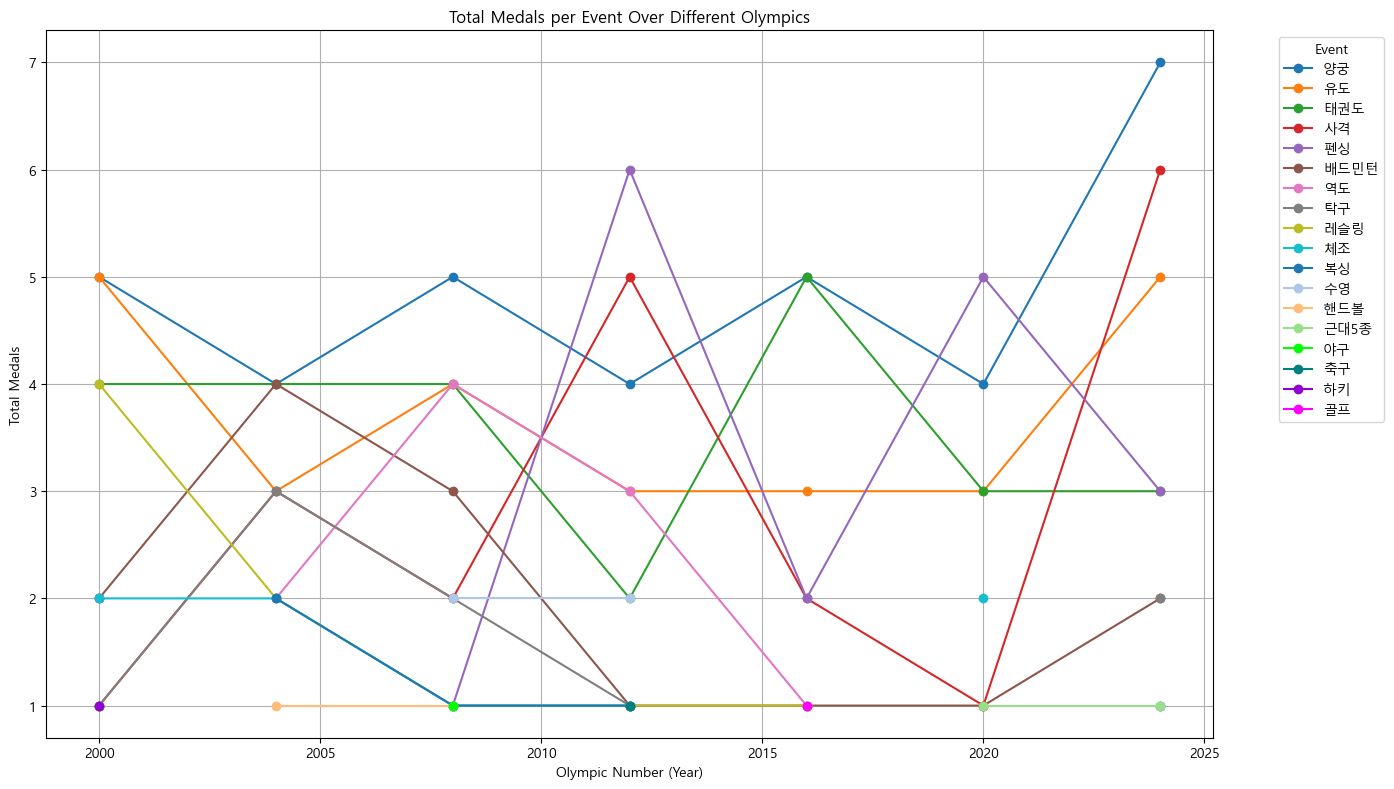

In [55]:
olympic_mapping = {
    '시드니': 2000,
    '아테네': 2004,
    '베이징': 2008,
    '런던': 2012,
    '리우데자네이루': 2016,
    '도쿄': 2020,
    '파리': 2024
}

olympic_new_df['num'] = olympic_new_df['city'].map(olympic_mapping)

olympic_new_df['total_medals'] = olympic_new_df['gold'] + olympic_new_df['silver'] + olympic_new_df['bronze']
medals_per_event = olympic_new_df.groupby(['num', 'event'])['total_medals'].sum().unstack()

total_medals_sum = medals_per_event.sum().sort_values(ascending=False)
sorted_events = total_medals_sum.index

plt.figure(figsize=(14, 8))

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#1f77b4', '#aec7e8', '#ffbb78', '#98df8a', '#00FF00', '#008080', '#9400D3', '#FF00FF'
]

for i, event in enumerate(sorted_events):
    plt.plot(medals_per_event.index, medals_per_event[event], marker='o', color=colors[i % len(colors)], label=event)
    
plt.title('Total Medals per Event Over Different Olympics')
plt.xlabel('Olympic Number (Year)')
plt.ylabel('Total Medals')
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
unique_events = medals_per_event.columns

chunks = [unique_events[i:i + 3] for i in range(0, len(unique_events), 3)]

for i, chunk in enumerate(chunks):
    plt.figure(figsize=(12, 7))
    for event in chunk:
        plt.plot(medals_per_event.index, medals_per_event[event], label=event)
    
    plt.title(f'Total Medals for Events: {", ".join(chunk)}')
    plt.xlabel('Olympic Number (Year)')
    plt.ylabel('Total Medals')
    plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

<Figure size 1200x700 with 0 Axes>

In [ ]:
olympics_data = pd.read_csv("./data/olympics_events.csv", encoding="utf-8")

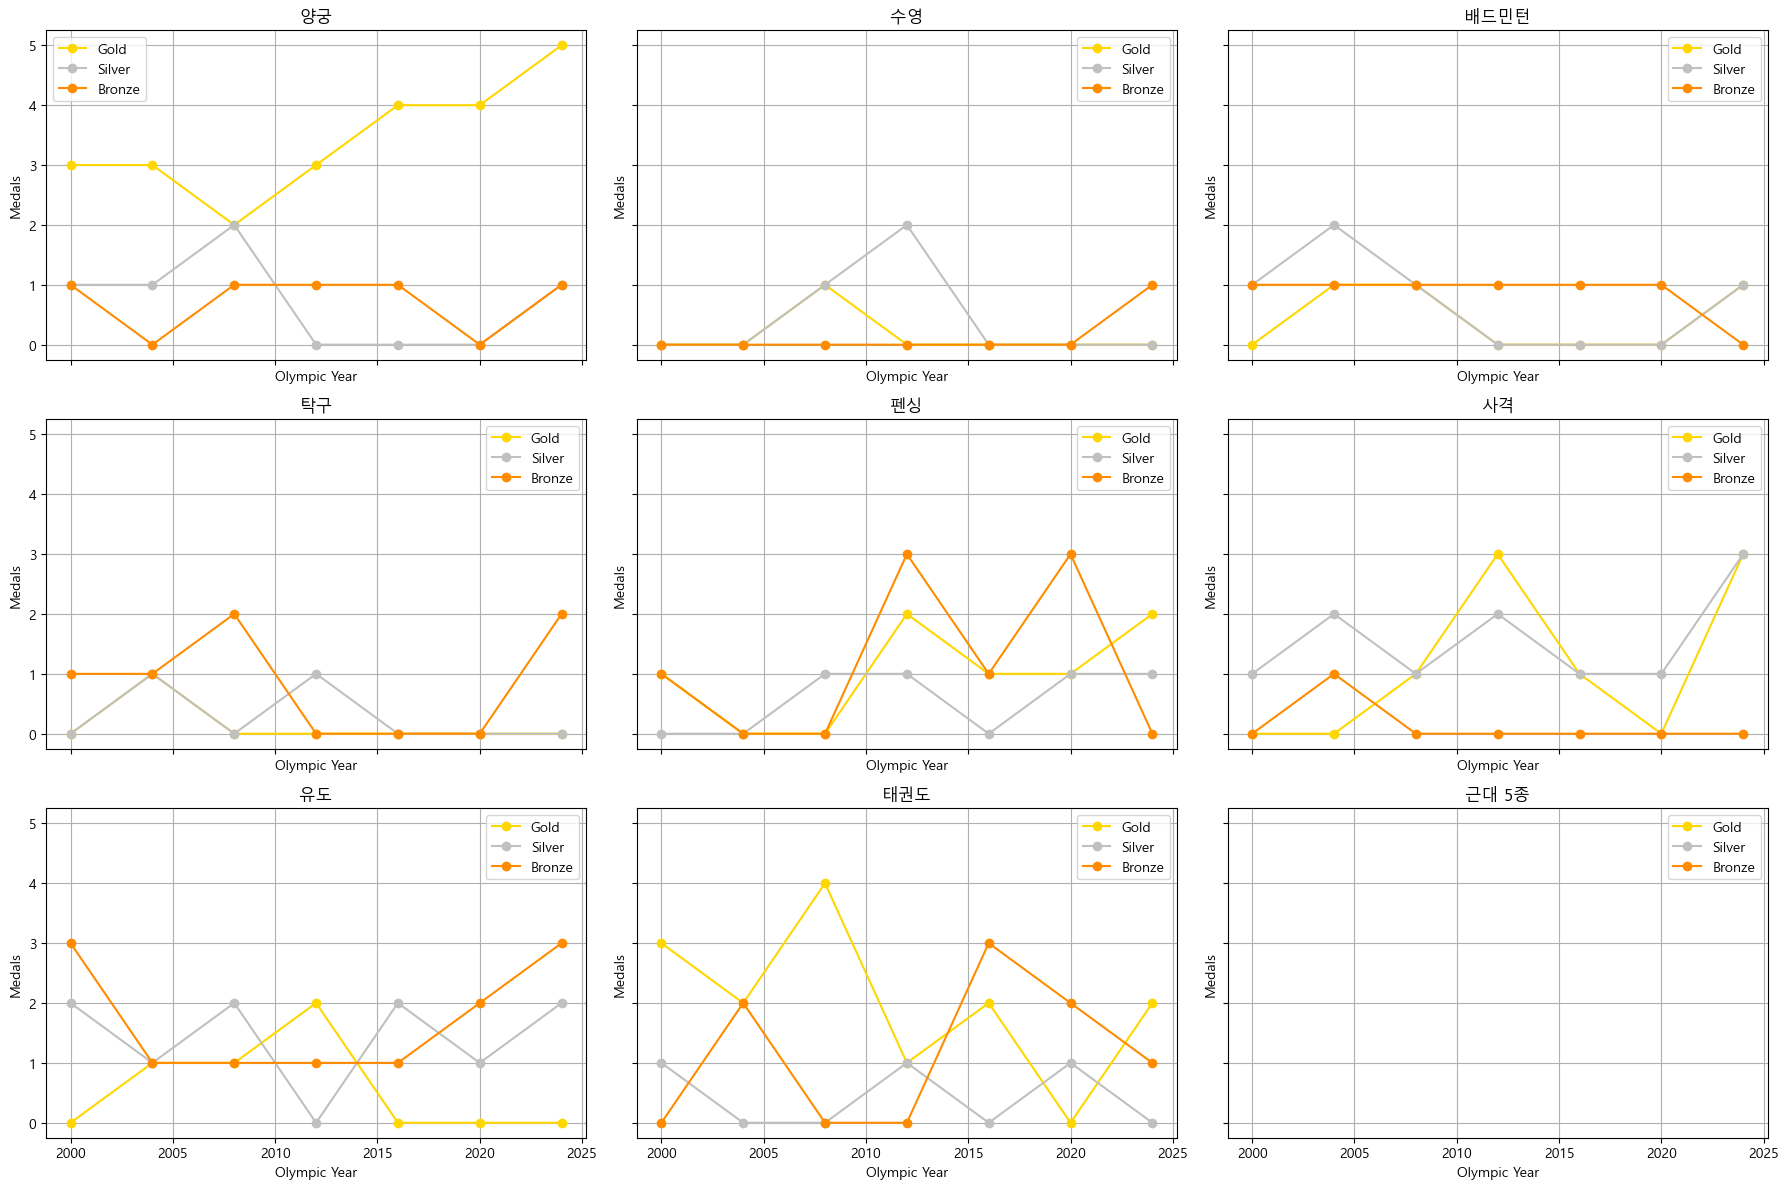

In [80]:
olympic_mapping = {
    '시드니': 2000,
    '아테네': 2004,
    '베이징': 2008,
    '런던': 2012,
    '리우데자네이루': 2016,
    '도쿄': 2020,
    '파리': 2024
}

olympics_data['num'] = olympics_data['city'].map(olympic_mapping)

selected_events = ['양궁', '수영', '배드민턴', '탁구', '펜싱', '사격', '유도', '태권도', '근대 5종']

filtered_data = olympics_data[olympics_data['event'].isin(selected_events)]

grouped_data = filtered_data.groupby(['event', 'num']).sum().reset_index()


fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)
axs = axs.flatten()

for idx, event in enumerate(selected_events):
    event_data = grouped_data[grouped_data['event'] == event]
    axs[idx].plot(event_data['num'], event_data['gold'], marker='o', color='gold', label='Gold')
    axs[idx].plot(event_data['num'], event_data['silver'], marker='o', color='silver', label='Silver')
    axs[idx].plot(event_data['num'], event_data['bronze'], marker='o', color='darkorange', label='Bronze')
    
    axs[idx].set_title(event)
    axs[idx].set_xlabel('Olympic Year')
    axs[idx].set_ylabel('Medals')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

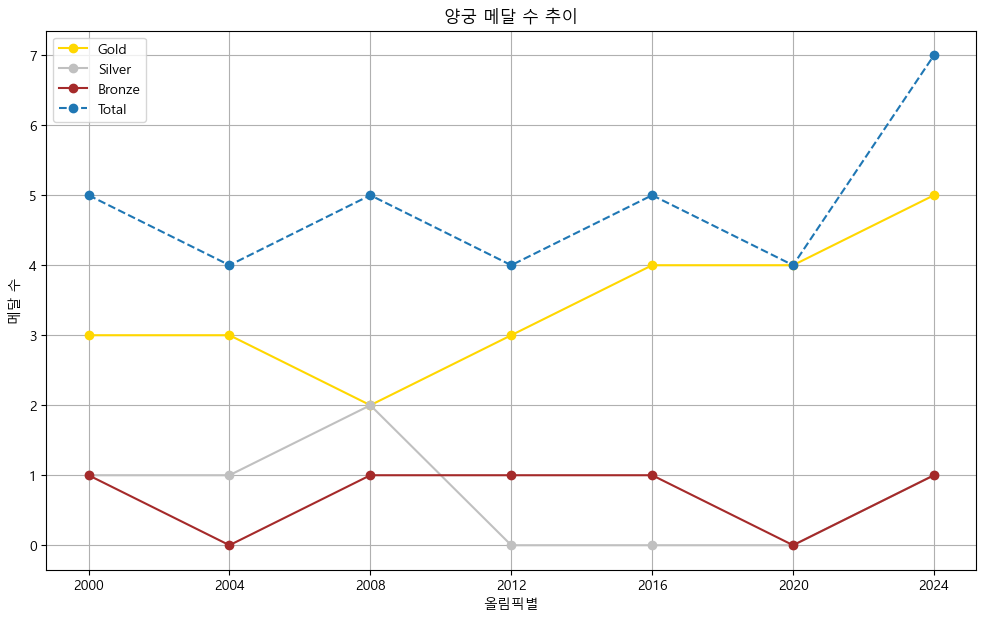

In [90]:
olympic_mapping = {
    '시드니': 2000,
    '아테네': 2004,
    '베이징': 2008,
    '런던': 2012,
    '리우데자네이루': 2016,
    '도쿄': 2020,
    '파리': 2024
}

olympics_data['year'] = olympics_data['city'].map(olympic_mapping)

event_data = olympics_data[olympics_data['event'] == '양궁']

event_data_grouped = event_data.groupby('year')[['gold', 'silver', 'bronze']].sum().reset_index()
event_data_grouped['total'] = event_data_grouped['gold'] + event_data_grouped['silver'] + event_data_grouped['bronze']

# 그래프 그리기
plt.figure(figsize=(12, 7))
plt.plot(event_data_grouped['year'], event_data_grouped['gold'], marker='o', color='Gold' ,label='Gold')
plt.plot(event_data_grouped['year'], event_data_grouped['silver'], marker='o',color='silver', label='Silver')
plt.plot(event_data_grouped['year'], event_data_grouped['bronze'], marker='o', color='brown', label='Bronze')
plt.plot(event_data_grouped['year'], event_data_grouped['total'], marker='o', linestyle='--', label='Total')

plt.title('양궁 메달 수 추이')
plt.xlabel('올림픽별')
plt.ylabel('메달 수')
plt.xticks(archery_data_grouped['year'])  # x축에 표시할 연도 설정
plt.legend()
plt.grid(True)
plt.show()


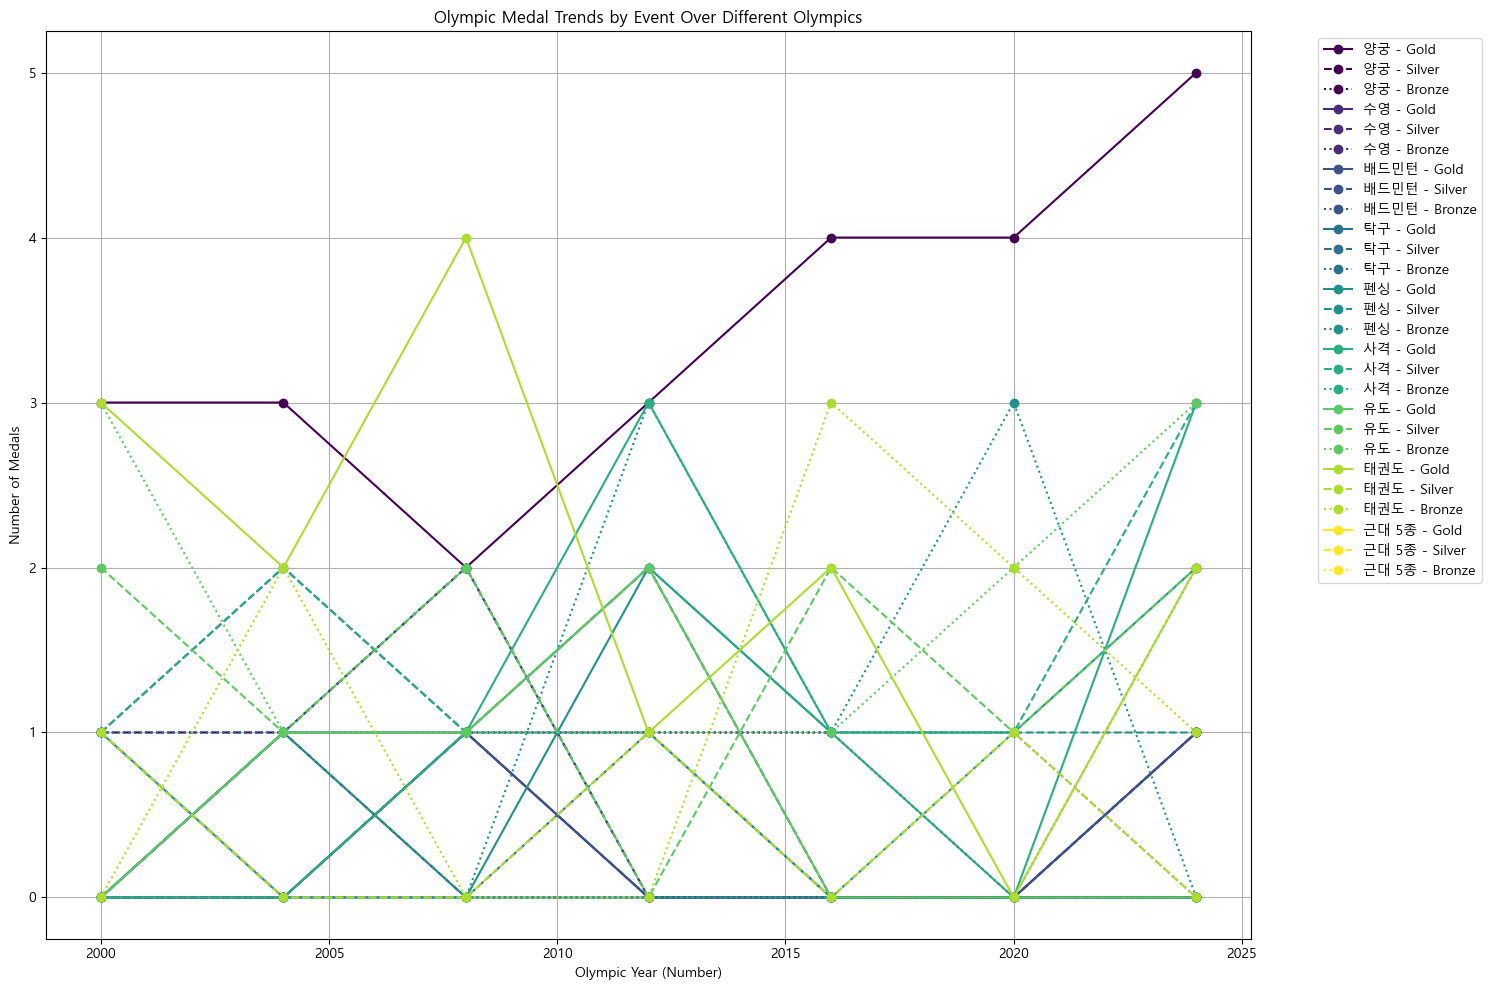

In [81]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")
import numpy as np

# 관심 있는 종목
selected_events = ['양궁', '수영', '배드민턴', '탁구', '펜싱', '사격', '유도', '태권도', '근대 5종']

# 모든 종목을 한 그래프에서 표시
plt.figure(figsize=(15, 10))

# 종목별 색상 설정을 위한 색상 사이클
colors = plt.cm.viridis(np.linspace(0, 1, len(selected_events)))

# 데이터 필터링 및 그룹화
filtered_data = olympics_data[olympics_data['event'].isin(selected_events)]
grouped_data = filtered_data.groupby(['event', 'num']).sum().reset_index()

for idx, event in enumerate(selected_events):
    event_data = grouped_data[grouped_data['event'] == event]
    # 금메달 추이
    plt.plot(event_data['num'], event_data['gold'], marker='o', color=colors[idx], label=f'{event} - Gold')
    # 은메달 추이
    plt.plot(event_data['num'], event_data['silver'], marker='o', linestyle='--', color=colors[idx], label=f'{event} - Silver')
    # 동메달 추이
    plt.plot(event_data['num'], event_data['bronze'], marker='o', linestyle=':', color=colors[idx], label=f'{event} - Bronze')

plt.title('Olympic Medal Trends by Event Over Different Olympics')
plt.xlabel('Olympic Year (Number)')
plt.ylabel('Number of Medals')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
from openai import OpenAI
from getpass import getpass

api_key=getpass("OPENAI_API_KEY")

OPENAI_API_KEY ········


In [3]:
client = OpenAI(api_key=api_key)

In [4]:
from pinecone import Pinecone

pinecone_api_key = getpass("PINECONE_API_KEY")

PINECONE_API_KEY ········


In [5]:
pc = Pinecone(api_key = pinecone_api_key)
index = pc.Index("olympic")